# I. Introductions

- Nama : Sihar H Pangaribuan
- Objectiv 
    - Data Analysis
    - Develop machine learning to predict sum Quantity for the nextmonth
    - Develop machine learning to customer segmentation

# II. Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab

from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from math import sqrt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from feature_engine.outliers import Winsorizer
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


import warnings
warnings.filterwarnings(action='ignore')

# III. Data Loading

In [2]:
# Load data
df_customer = pd.read_csv('Case Study - Customer.csv', delimiter=';')
df_product = pd.read_csv('Case Study - Product.csv', delimiter=';')
df_store = pd.read_csv('Case Study - Store.csv', delimiter=';')
df_transaction = pd.read_csv('Case Study - Transaction.csv', delimiter=';')

In [3]:
df_customer.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


In [4]:
df_product.head()

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [5]:
df_store.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"


In [6]:
df_transaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


# IV. Data Cleaning

### IV.1. Data Cleaning in Data Customer

In [7]:
#Check general information
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


In [8]:
# Check duplicated value
df_customer.duplicated().sum()

0

- Found a missing value in the `Marital status` column, it will be handled by deleting
- In column `Income` the dtype is not correct it wil change to dtype integer
- There is no duplicated data

In [9]:
# Dropping Missing value 
df_customer.dropna(inplace=True)

In [10]:
# Repalace , with . and change dtype
df_customer['Income'] = df_customer['Income'].replace(',','.',regex=True).astype('float')

In [11]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 444 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      444 non-null    int64  
 1   Age             444 non-null    int64  
 2   Gender          444 non-null    int64  
 3   Marital Status  444 non-null    object 
 4   Income          444 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 20.8+ KB


### IV.2. Data Cleaning in Data Product

In [12]:
#Check general information
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


In [13]:
# Check duplicated value
df_product.duplicated().sum()

0

### IV.3. Data Cleaning in Data Store

In [14]:
#Check general information
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StoreID     14 non-null     int64 
 1   StoreName   14 non-null     object
 2   GroupStore  14 non-null     object
 3   Type        14 non-null     object
 4   Latitude    14 non-null     object
 5   Longitude   14 non-null     object
dtypes: int64(1), object(5)
memory usage: 800.0+ bytes


In [15]:
# Check duplicated value
df_store.duplicated().sum()

0

### IV.4. Data Cleaning in Data Transaction

In [16]:
#Check general information
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


In [17]:
# Check duplicated value
df_transaction.duplicated().sum()

0

- Column `date` not correct dtype it will change to date

In [18]:
# change to dtype date
df_transaction['Date'] = pd.to_datetime(df_transaction['Date'], format='%d/%m/%Y')

# V. Merge all data

In [19]:
#Merge all data
data = pd.merge(df_transaction, df_customer, on='CustomerID')
data = pd.merge(data, df_product, on='ProductID')
data = pd.merge(data, df_store, on='StoreID')

In [20]:
data.head()

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,Price_y,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,0.18,Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,4.36,Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
3,TR4331,335,2022-01-08,P3,7500,3,22500,12,29,1,Single,4.74,Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"
4,TR6445,181,2022-01-10,P3,7500,4,30000,12,33,1,Married,9.94,Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554"


#  VI. Exploratory Data Analysis

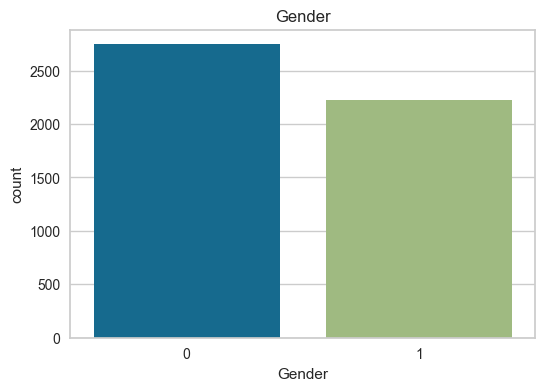

In [21]:
# Plot Count Gender
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=data)
plt.title('Gender')
plt.show()

- Dominan customer gender is female 

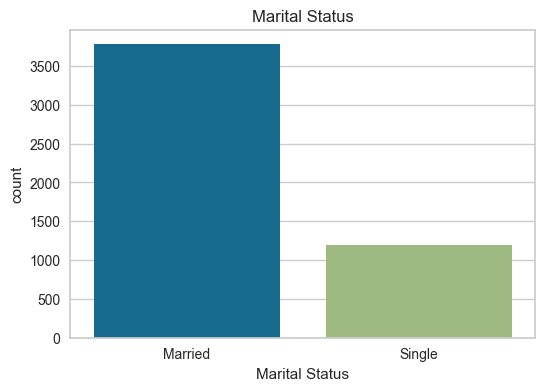

In [22]:
# Plot Count Marital Status
plt.figure(figsize=(6,4))
sns.countplot(x='Marital Status', data=data)
plt.title('Marital Status')
plt.show()

- Dominan customer Marital Status is Married 

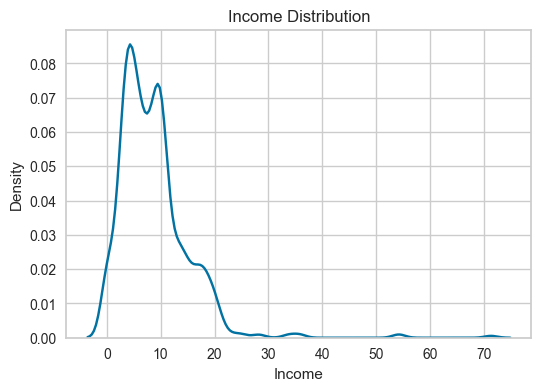

In [23]:
# Plot Income Distribution
plt.figure(figsize=(6,4))
sns.kdeplot(data['Income'])
plt.title('Income Distribution')
plt.show()

Customer dominan income is between IDR 0 and 20 Million

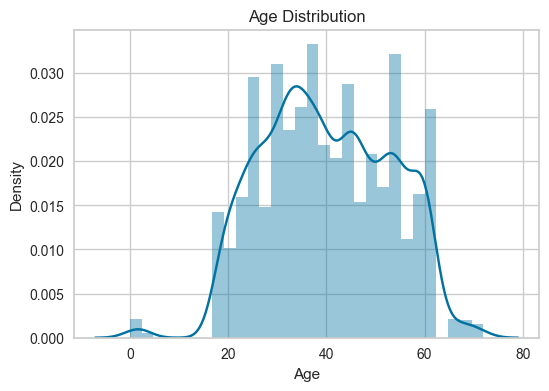

In [24]:
# Plot Age Distribution
plt.figure(figsize=(6,4))
sns.distplot(data['Age'])
plt.title('Age Distribution')
plt.show()

- Dominan age customer is betweend 20 and 60 years old
- There is some data anomali because age is 0

In [25]:
dv1 = data.groupby('Date').agg({
    'Qty' : 'sum',
    'TotalAmount' : 'sum'
}).reset_index()
dv1.head()

,Date,Qty,TotalAmount
0,2022-01-01,49,431200
1,2022-01-02,59,613600
2,2022-01-03,63,561300
3,2022-01-04,45,396500
4,2022-01-05,28,254600


In [26]:
# Extract to month
date_col = pd.DatetimeIndex(dv1['Date'])
dv1['month'] = date_col.month

In [27]:
# Group data by month
v1 = dv1.groupby('month').agg({
    'Qty' : 'sum',
    'TotalAmount' : 'sum'
}).reset_index()

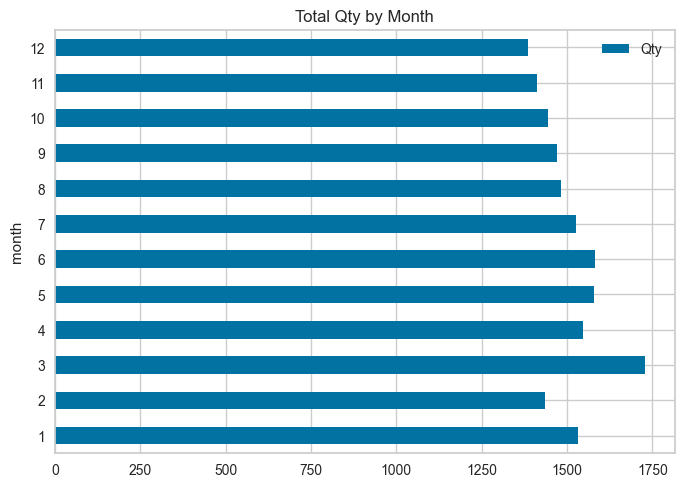

In [28]:
# Plot Total Qty By Month
v1.plot(y='Qty', x='month', kind='barh')
plt.title('Total Qty by Month')
plt.show()

- The top quantity is in the month of March

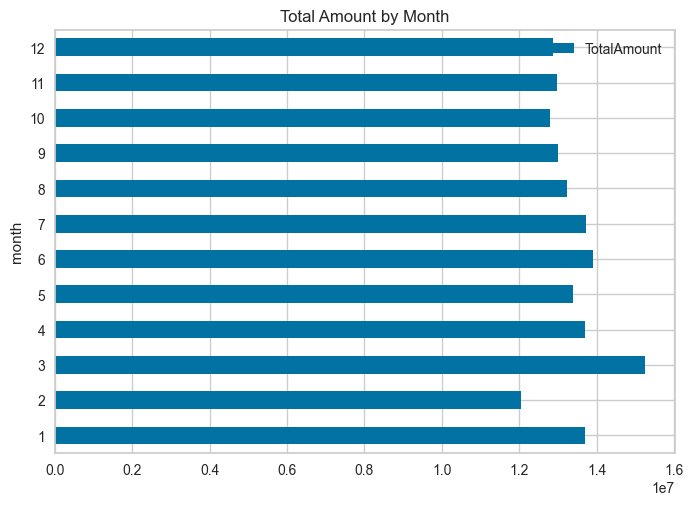

In [29]:
# Plot Total Amount By Month
v1.plot(y='TotalAmount', x='month', kind='barh')
plt.title('Total Amount by Month')
plt.show()

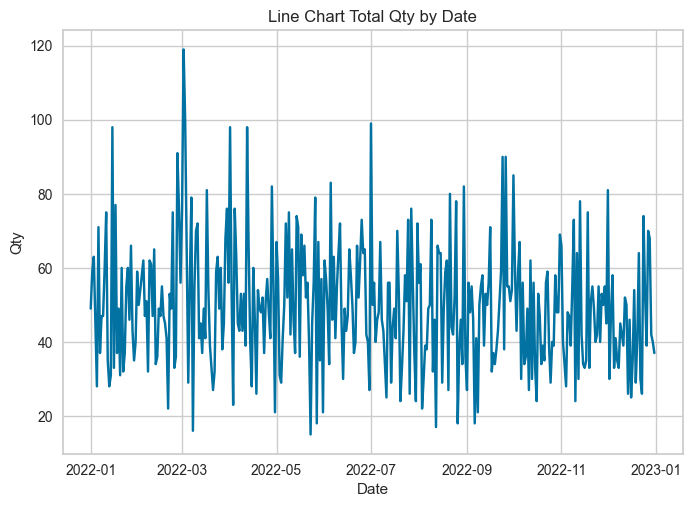

In [30]:
# Plot Total Qty by Date
sns.lineplot(data=dv1, x=dv1['Date'], y=dv1['Qty'])
plt.title('Line Chart Total Qty by Date')
plt.show()

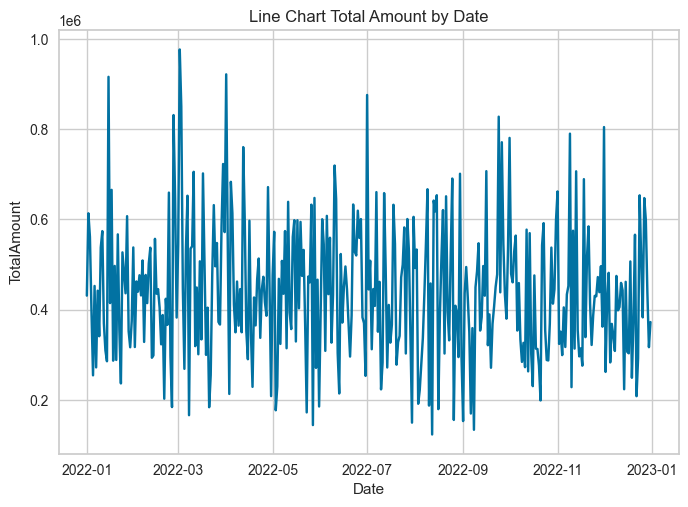

In [31]:
# Plot Total Amount by Date
sns.lineplot(data=dv1, x=dv1['Date'], y=dv1['TotalAmount'])
plt.title('Line Chart Total Amount by Date')
plt.show()

In [32]:
# Group data by Store Name 
dv2 = data.groupby(['StoreName']).agg({
    'Qty' : 'sum',
    'TotalAmount' : 'sum'
}).reset_index()
dv2.head()

,StoreName,Qty,TotalAmount
0,Bonafid,1281,11572100
1,Buana,1290,11082700
2,Buana Indah,1191,10493700
3,Gita Ginara,1223,11002900
4,Harapan Baru,1267,11208700


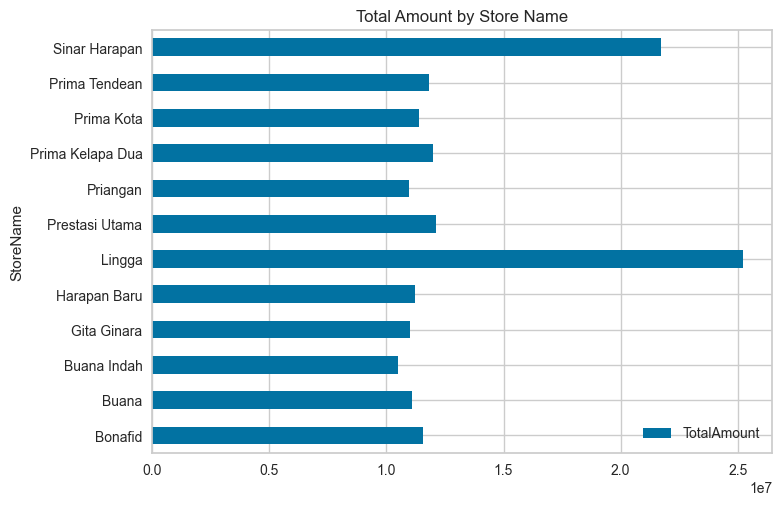

In [33]:
# Plot Total Amount By Store Name
dv2.plot(y='TotalAmount', x='StoreName', kind='barh')
plt.title('Total Amount by Store Name')
plt.show()

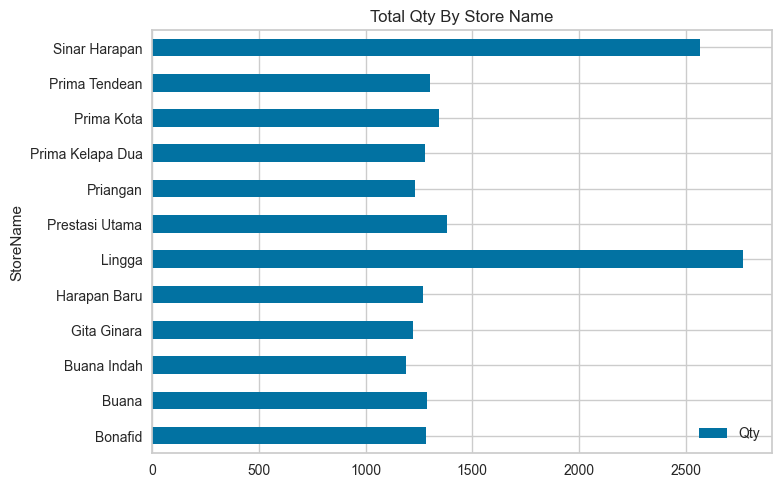

In [34]:
# Plot Total Qty By Store Name
dv2.plot(y='Qty', x='StoreName', kind='barh')
plt.title('Total Qty By Store Name')
plt.show()

The top Total amount  is from store name lingga

In [35]:
# Group data by Product Name 
dv3 = data.groupby(['Product Name']).agg({
    'Qty' : 'sum',
    'TotalAmount' : 'sum'
}).reset_index()
dv3.head()

,Product Name,Qty,TotalAmount
0,Cashew,624,11232000
1,Cheese Stick,1817,27255000
2,Choco Bar,2377,20917600
3,Coffee Candy,2075,19505000
4,Crackers,1815,13612500


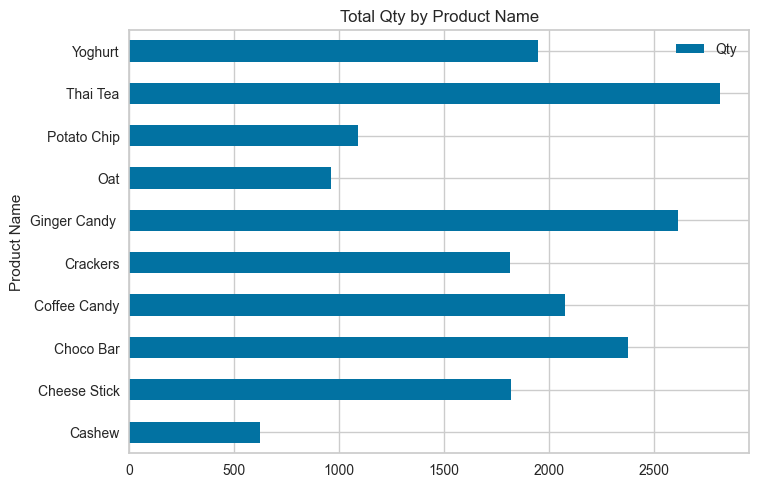

In [36]:
# Plot Total Amount By Month
dv3.plot(y='Qty', x='Product Name', kind='barh')
plt.title('Total Qty by Product Name')
plt.show()

The most sold product is Thai tea

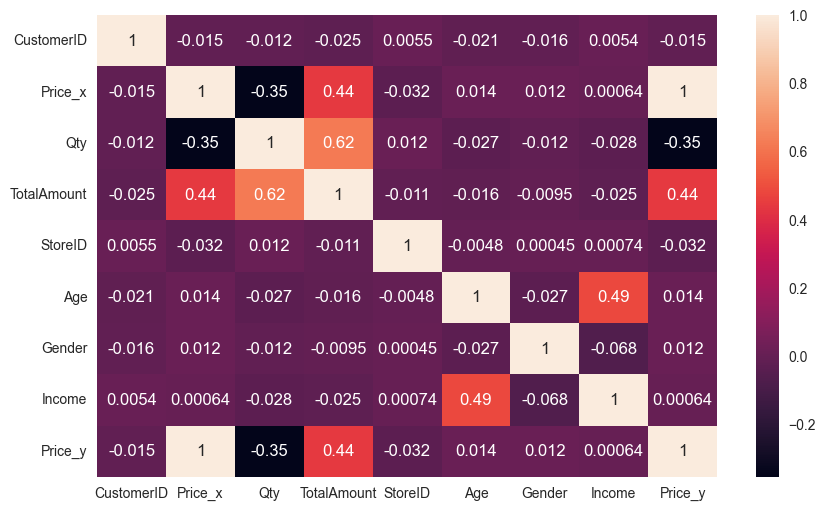

In [37]:
# Plot Correlation in data Numeric
data_num = data.select_dtypes(include=[np.number]).columns.tolist()
fig,ax = plt.subplots(figsize=[10,6])
corr = data[data_num].corr()
ax = sns.heatmap(corr,annot=True)
plt.show()

# VII. Machine Learning Regression (Time Series)

### VII.1. Group Data by Date

In [38]:
# Grouping data by date 
data1 = data.groupby(['Date']).agg({
    'Qty' : 'sum'
}).reset_index()

data1.head()

,Date,Qty
0,2022-01-01,49
1,2022-01-02,59
2,2022-01-03,63
3,2022-01-04,45
4,2022-01-05,28


In [39]:
# Check shape data
data1.shape

(365, 2)

### VII.2. Check Stationaruty

In [40]:
# Fungsion to check stationarity
def check_stationarity(series):
    # Copied from https://machinelearningmastery.com/time-series-data-stationary-python/

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [41]:
# Check stationarity
check_stationarity(data1['Qty'])

ADF Statistic: -19.248302
p-value: 0.000000
Critical Values:
	1%: -3.448
	5%: -2.870
	10%: -2.571
Stationary


### VII.3. Plot Data

<Axes: xlabel='Date', ylabel='Qty'>

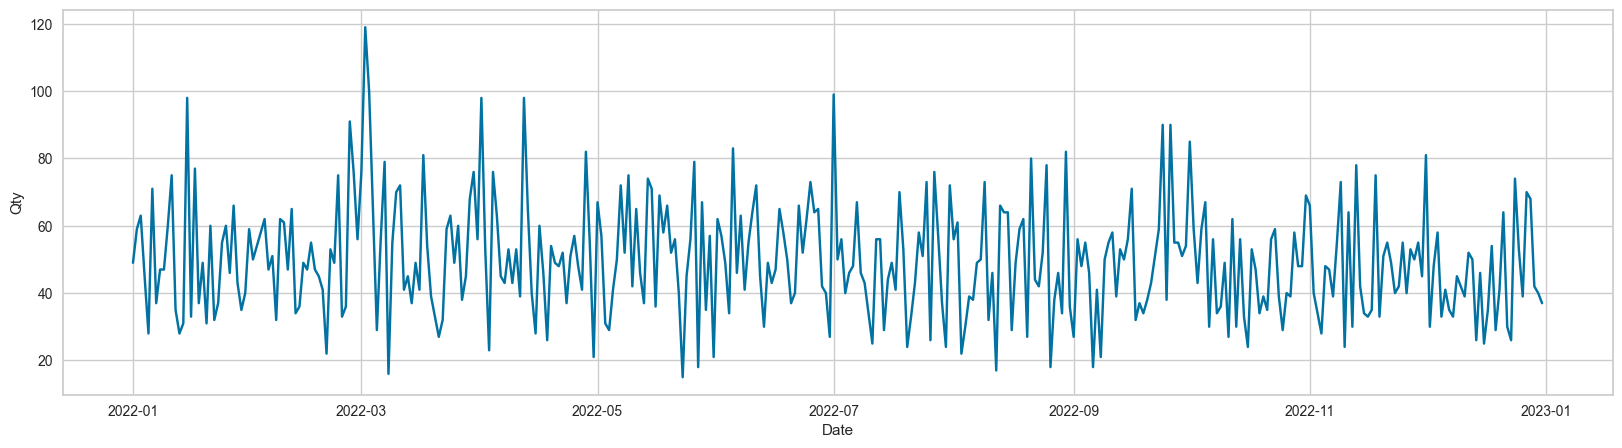

In [42]:
# Plot data
plt.figure(figsize=(20,5))
sns.lineplot(data=data1, x=data1['Date'], y=data1['Qty'])

### VII.4. Split data between data train and test

In [43]:
#splitting train and test
train = data1[:330] 
test = data1[330:]

In [44]:
train.tail()

,Date,Qty
325,2022-11-22,49
326,2022-11-23,40
327,2022-11-24,42
328,2022-11-25,55
329,2022-11-26,40


In [45]:
test.tail()

,Date,Qty
360,2022-12-27,70
361,2022-12-28,68
362,2022-12-29,42
363,2022-12-30,40
364,2022-12-31,37


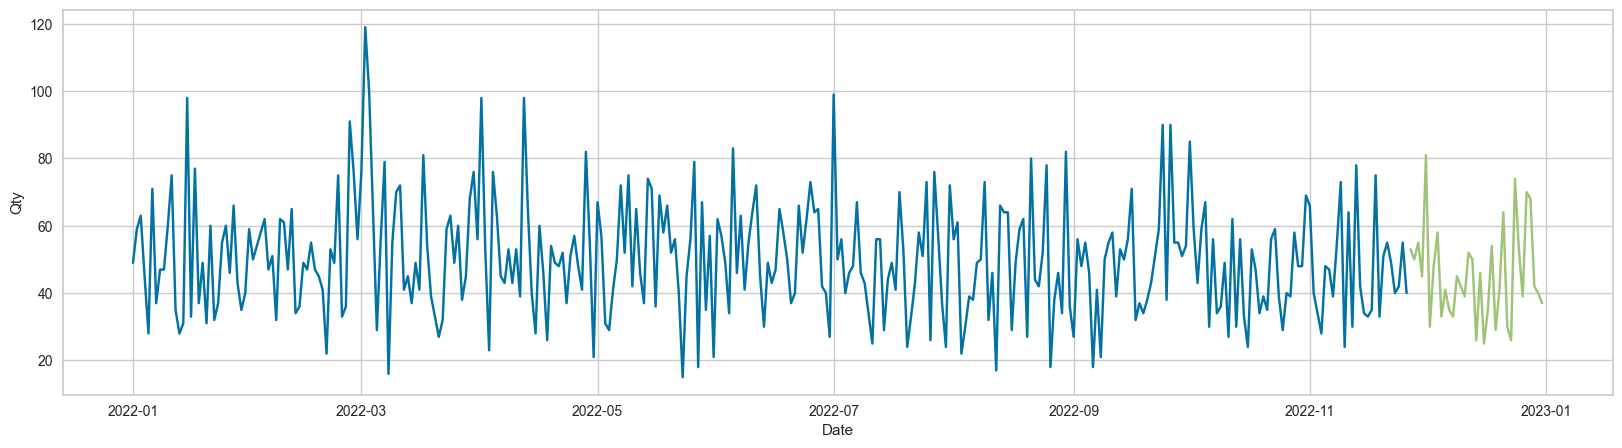

In [46]:
# plot data train and data test
plt.figure(figsize=(20,5))
sns.lineplot(data=train, x=train['Date'], y=train['Qty'])
sns.lineplot(data=test, x=test['Date'], y=test['Qty'])
plt.show()

### VII.5. Plot Autocorrelation

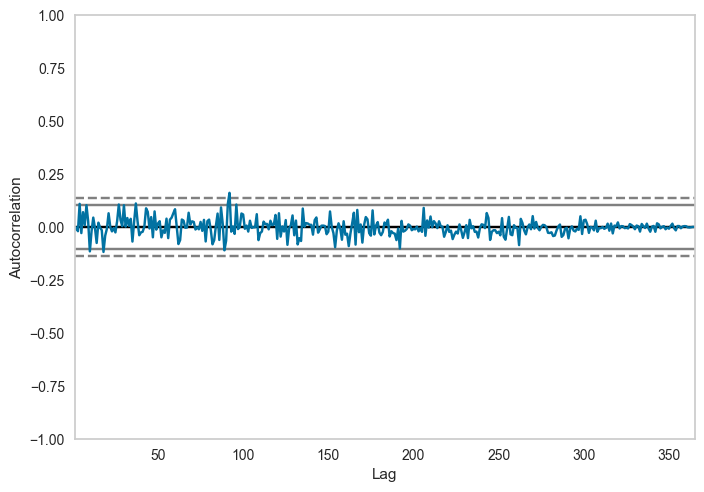

In [47]:
autocorrelation_plot(data1['Qty'])
pylab.show()

### VII.6. Decompose Stationarity

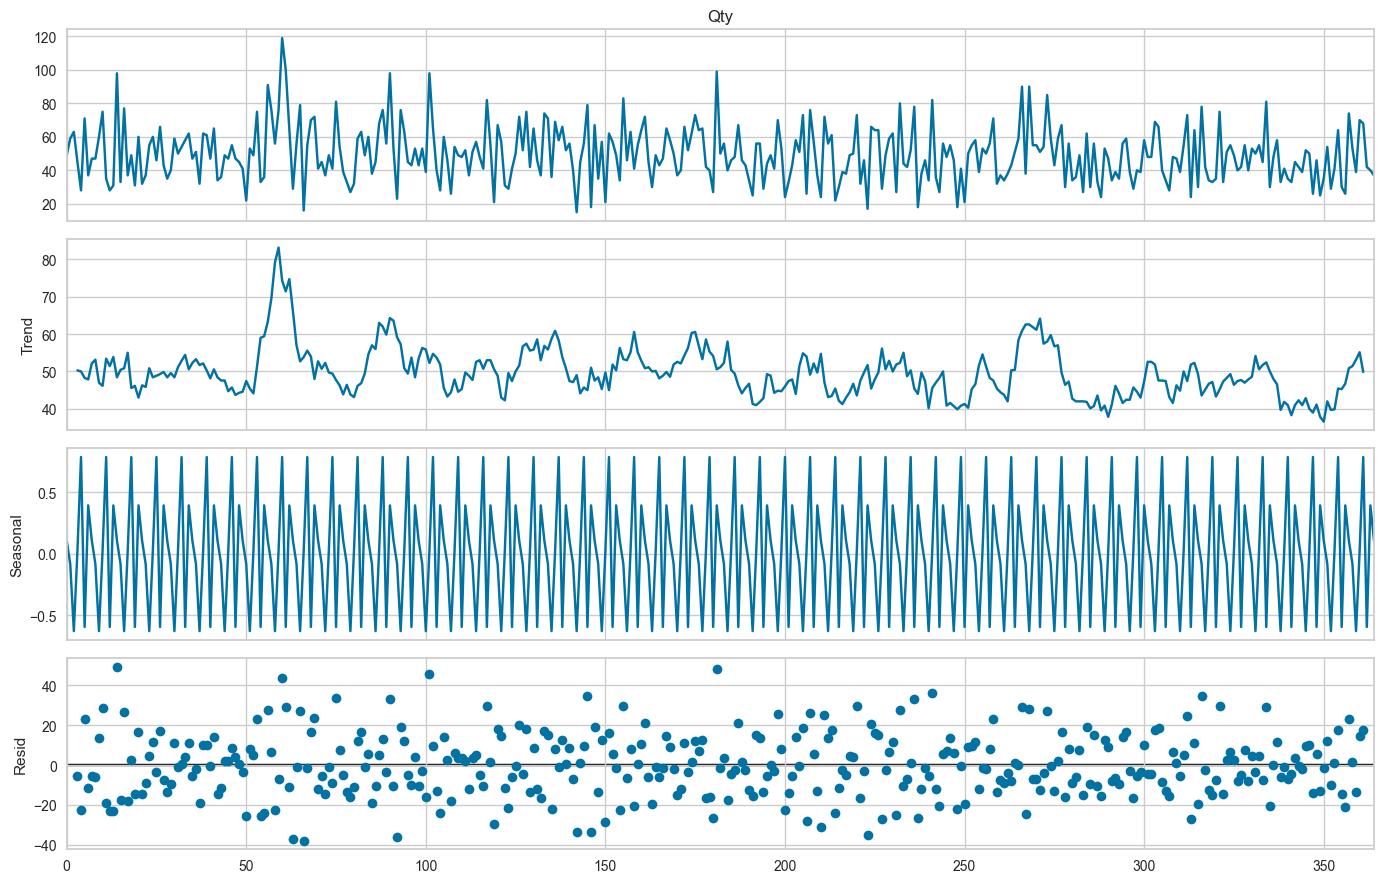

In [48]:
# Decompose using model additive
pylab.rcParams['figure.figsize'] = (14, 9)
res = seasonal_decompose(data1['Qty'],model='additive', period=7)
ax=res.plot()
plt.show()

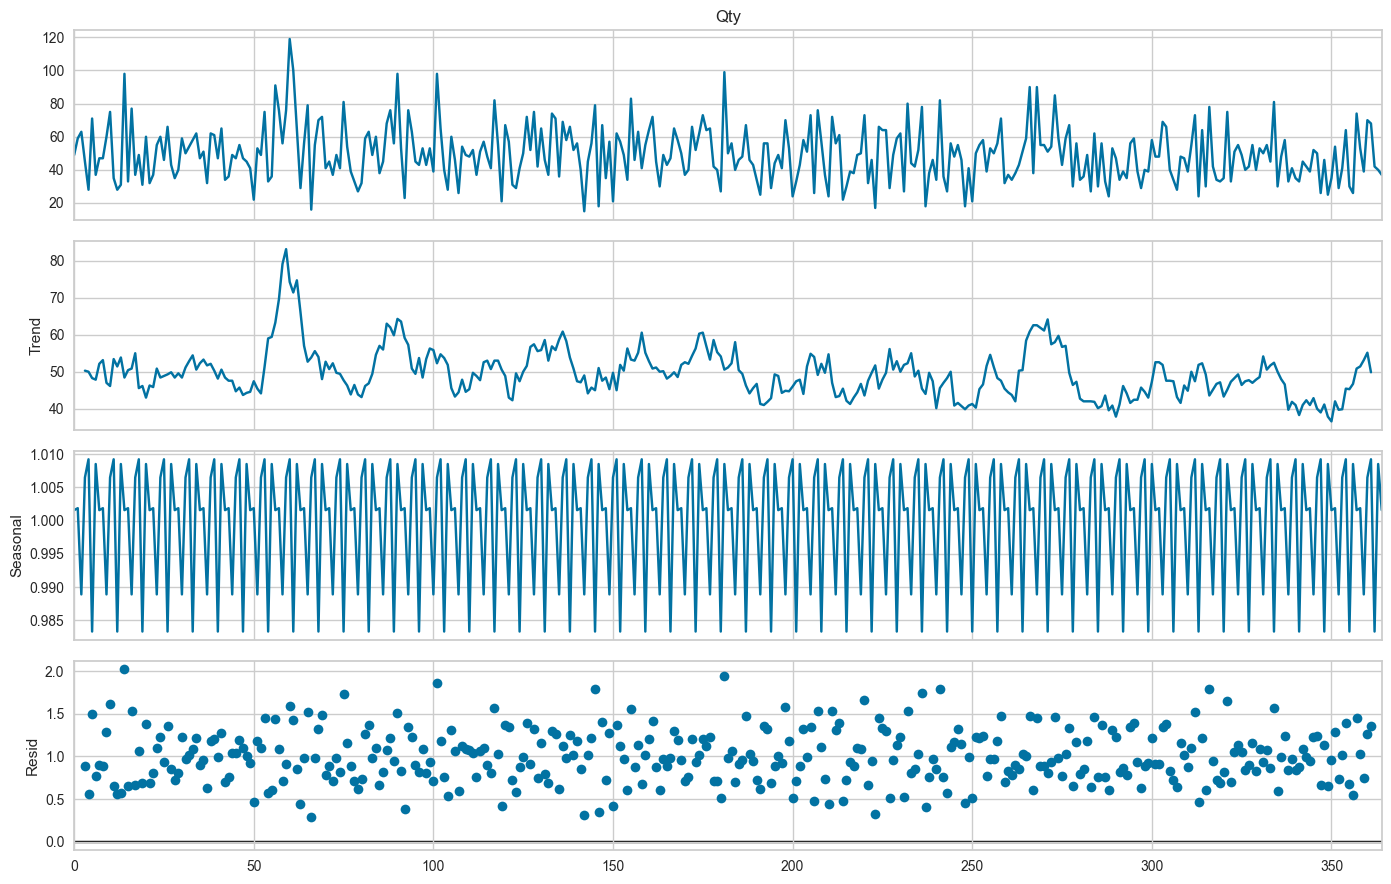

In [49]:
# Decompose using model multiplicative
pylab.rcParams['figure.figsize'] = (14, 9)
#We try to look at the data in yearly period, since the data are in monthly period, we aggregate it into 12 period
res = seasonal_decompose(data1['Qty'],model='multiplicative', period=7)
ax=res.plot()
plt.show()

###  VII.7. Forecast using ARIMA

In [50]:
train = train.set_index('Date')
test = test.set_index('Date')

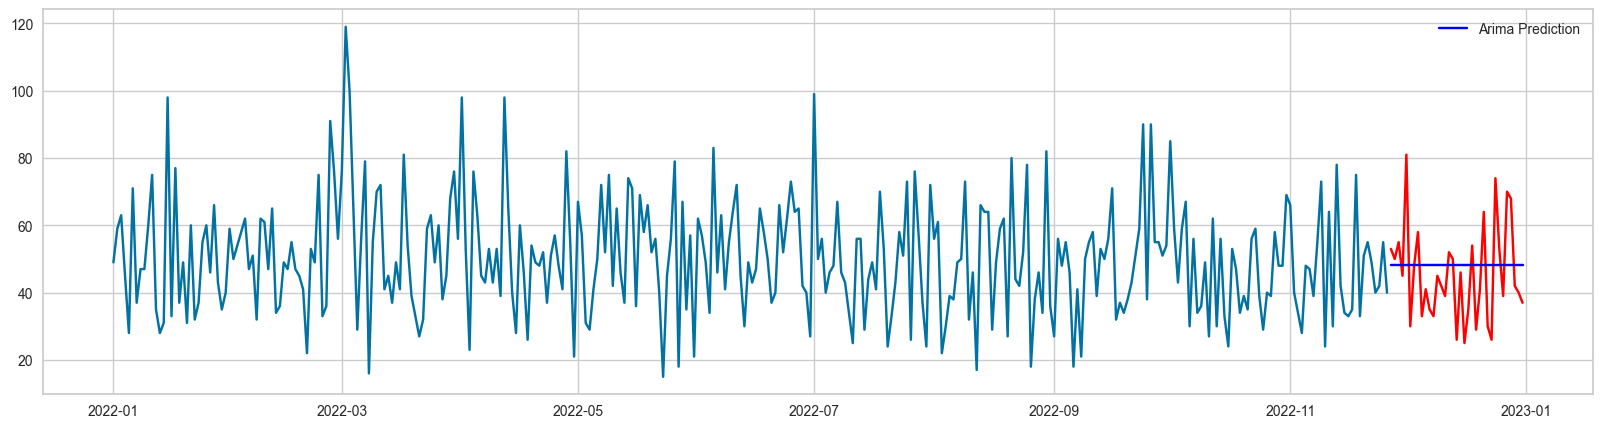

In [51]:
model = ARIMA(train['Qty'], order=(0,1,1))
ARIMAmodel = model.fit()

y_pred = ARIMAmodel.get_forecast(len(test))

y_pred_df = y_pred.conf_int()
y_pred_df['prediction'] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df['prediction']

plt.figure(figsize=(20,5))
plt.plot(train['Qty'])
plt.plot(test['Qty'], color='red')
plt.plot(y_pred_out, color='blue', label ='Arima Prediction')
plt.legend()



mae : 11.527880301198927
rmse : 15.110559836783594


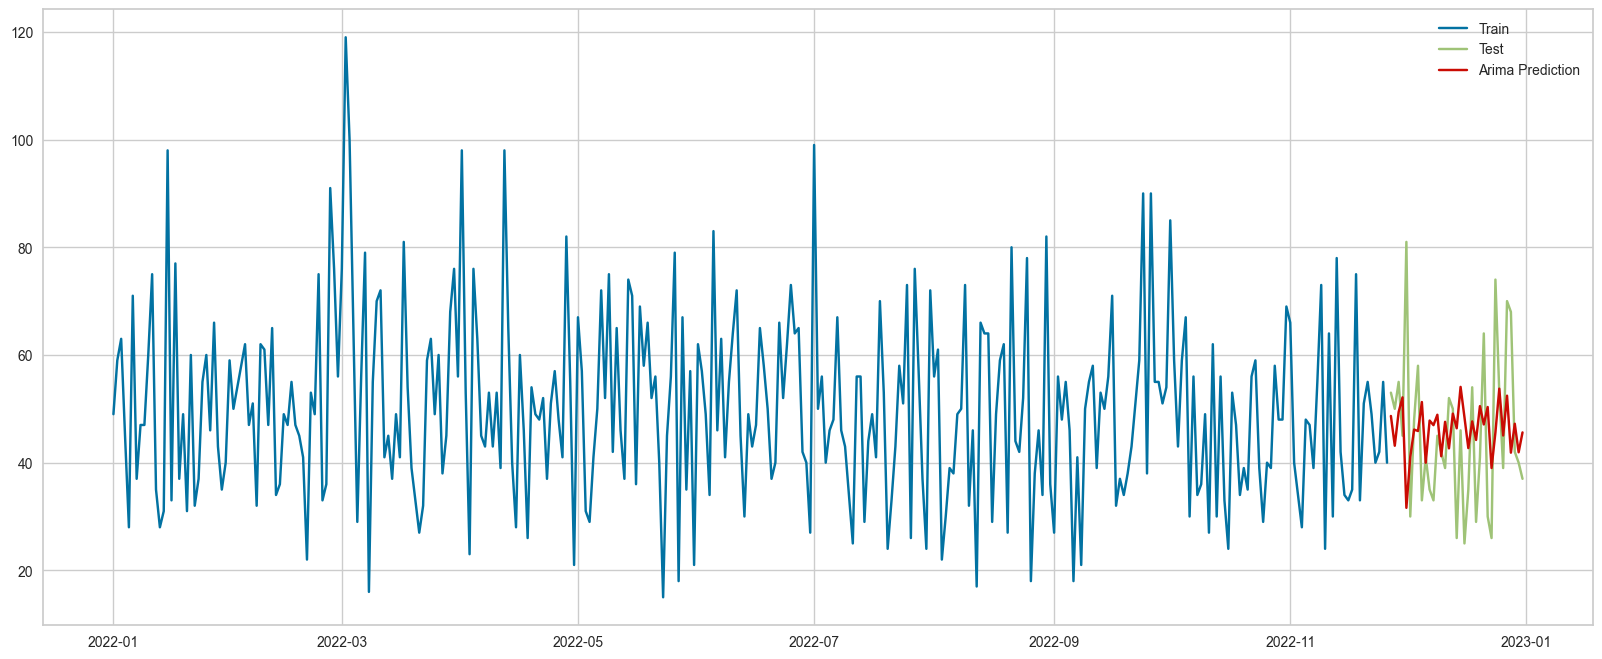

In [52]:
# Tuning 
model = ARIMA(train['Qty'], order=(45,1,1))
ARIMAmodel = model.fit()

y_pred = ARIMAmodel.get_forecast(len(test))

y_pred_df = y_pred.conf_int()
y_pred_df['prediction'] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df['prediction']

plt.figure(figsize=(20,8))
plt.plot(train['Qty'], label='Train')
plt.plot(test['Qty'],  label='Test')
plt.plot(y_pred_out, label ='Arima Prediction')
plt.legend(loc='best')

print("mae :", mean_absolute_error(test.Qty, y_pred_df.prediction))
print("rmse :", sqrt(mean_squared_error(test.Qty, y_pred_df.prediction)))

### VII.8. Forecast Holt-Winters

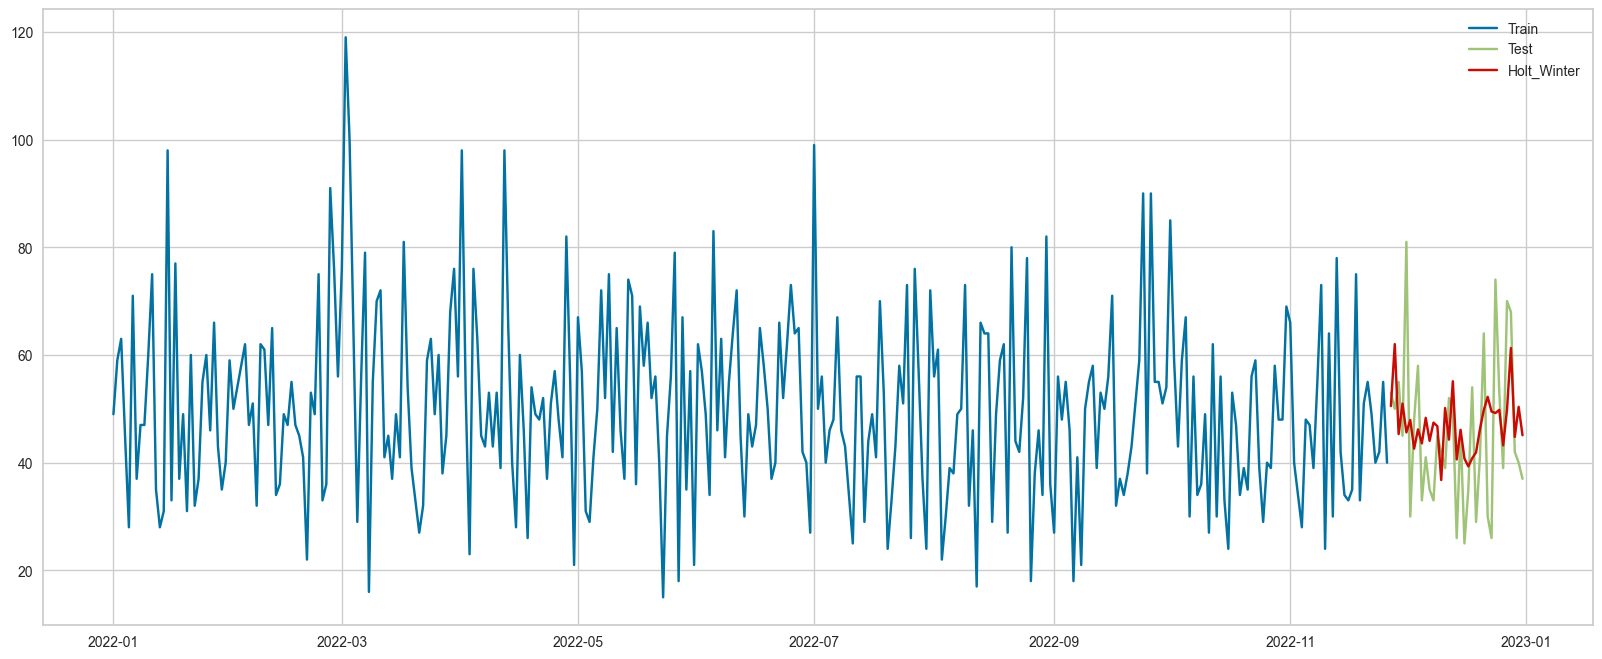

mae : 10.837160150320106
rmse : 13.186123282264825


In [53]:
y_hat_avg = test.copy()
model = ExponentialSmoothing(np.asarray(train['Qty']) ,seasonal_periods=30 ,trend='multiplicative', seasonal='multiplicative',).fit()
y_hat_avg['Holt_Winter'] = model.forecast(len(test))
plt.figure(figsize=(20,8))
plt.plot( train['Qty'], label='Train')
plt.plot(test['Qty'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

print("mae :", mean_absolute_error(test.Qty, y_hat_avg.Holt_Winter))
print("rmse :", sqrt(mean_squared_error(test.Qty, y_hat_avg.Holt_Winter)))

In [54]:
y_hat_avg

,Qty,Holt_Winter
Date,,
2022-11-27,53,50.517387
2022-11-28,50,62.014713
2022-11-29,55,45.313240
2022-11-30,45,50.968701
2022-12-01,81,45.621510
2022-12-02,30,47.920375
2022-12-03,48,42.602073
2022-12-04,58,46.173004
2022-12-05,33,43.585030


### VII.9. Forecast Holt-Winters treend multiplicative

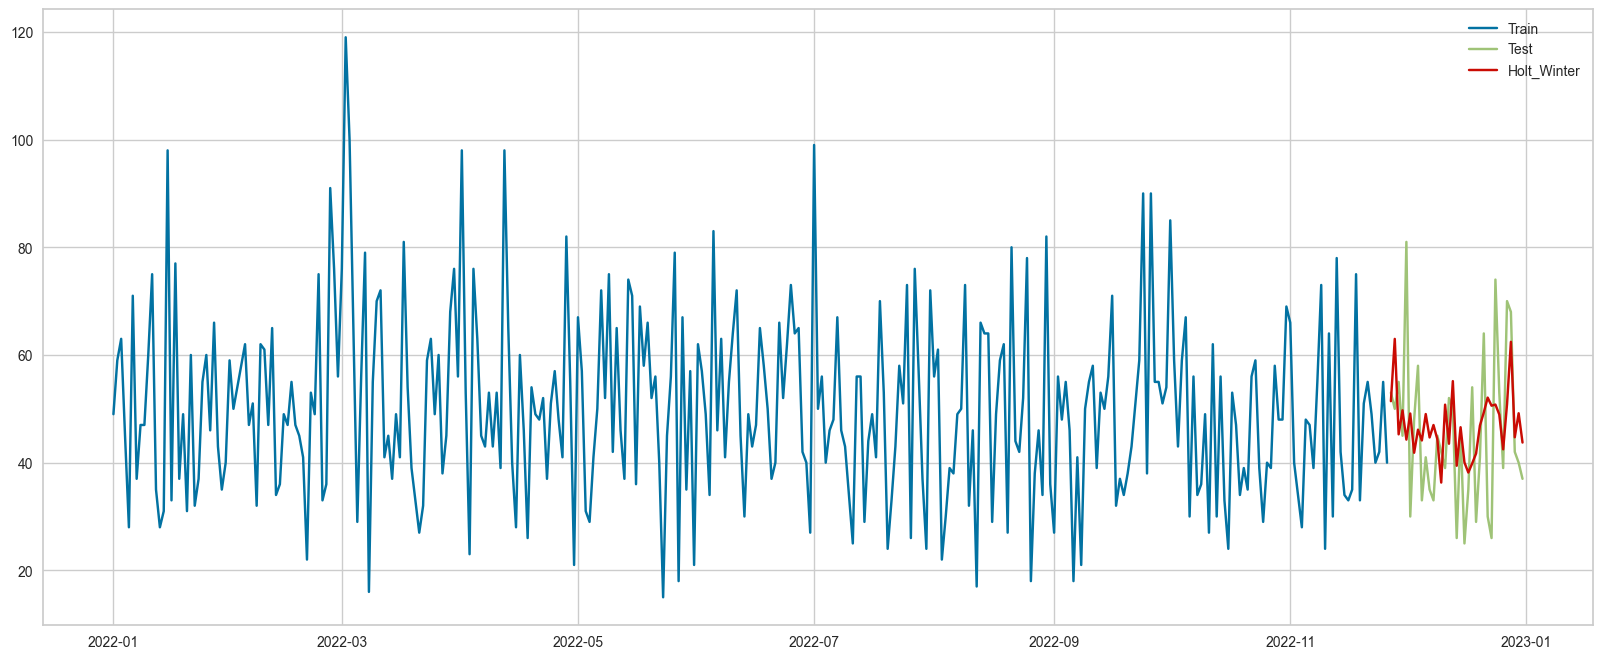

mae : 10.794775305429818
rmse : 13.255120170502002


In [55]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Qty']) ,seasonal_periods=30 ,trend='multiplicative', seasonal='additive',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(20,8))
plt.plot( train['Qty'], label='Train')
plt.plot(test['Qty'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

print("mae :", mean_absolute_error(test.Qty, y_hat_avg.Holt_Winter))
print("rmse :", sqrt(mean_squared_error(test.Qty, y_hat_avg.Holt_Winter)))

###  VII.10.Inference

In [56]:
model = ARIMA(train['Qty'], order=(45,1,1))
ARIMAmodel = model.fit()
ARIMAmodel.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    Qty   No. Observations:                  330
Model:                ARIMA(45, 1, 1)   Log Likelihood               -1371.566
Date:                Mon, 31 Jul 2023   AIC                           2837.132
Time:                        09:50:10   BIC                           3015.546
Sample:                    01-01-2022   HQIC                          2908.306
                         - 11-26-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5679      0.463     -1.227      0.220      -1.475       0.340
ar.L2         -0.5321      0.470     -1.131      0.258      -1.454       0.390
ar.L3         -0.5961      0.452     -1.319      0.187      -1.482       0.290
ar.L4         -0.4610      0.478     -0.963      0.335      -1.399       0.477
ar.L5         -0.5097      0.418     -1.220      0.223      -1.329       0.309
ar.L6         -0.4633      0.413     -1.122      0.262      -1.272       0.346
ar.L7         -0.4751      0.400     -1.189      0.235      -1.258       0.308
ar.L8         -0.3422      0.402     -0.851      0.395      -1.130       0.446
ar.L9         -0.3618      0.341     -1.062      0.288      -1.029       0.306
ar.L10        -0.5040      0.314     -1.607      0.108      -1.119       0.111
ar.L11        -0.4594      0.364     -1.261      0.207      -1.174       0.255
ar.L12        -0.3795      0.369     -1.028      0.304      -1.103       0.344
ar.L13        -0.4221      0.340     -1.240      0.215      -1.089       0.245
ar.L14        -0.4605      0.350     -1.315      0.188      -1.147       0.226
ar.L15        -0.4239      0.369     -1.149      0.250      -1.147       0.299
ar.L16        -0.4513      0.355     -1.271      0.204      -1.147       0.245
ar.L17        -0.4571      0.357     -1.280      0.201      -1.157       0.243
ar.L18        -0.5532      0.371     -1.490      0.136      -1.281       0.175
ar.L19        -0.4964      0.417     -1.190      0.234      -1.314       0.321
ar.L20        -0.5398      0.405     -1.332      0.183      -1.334       0.255
ar.L21        -0.4451      0.421     -1.057      0.290      -1.270       0.380
ar.L22        -0.4458      0.384     -1.162      0.245      -1.198       0.306
ar.L23        -0.4942      0.368     -1.344      0.179      -1.215       0.226
ar.L24        -0.4567      0.377     -1.211      0.226      -1.196       0.282
ar.L25        -0.5010      0.371     -1.349      0.177      -1.229       0.227
ar.L26        -0.4008      0.383     -1.047      0.295      -1.151       0.349
ar.L27        -0.2743      0.343     -0.801      0.423      -0.946       0.397
ar.L28        -0.3109      0.276     -1.128      0.259      -0.851       0.229
ar.L29        -0.3326      0.252     -1.319      0.187      -0.827       0.162
ar.L30        -0.2060      0.259     -0.796      0.426      -0.713       0.301
ar.L31        -0.2582      0.208     -1.244      0.214      -0.665       0.149
ar.L32        -0.2138      0.202     -1.061      0.289      -0.609       0.181
ar.L33        -0.2314      0.199     -1.165      0.244      -0.621       0.158
ar.L34        -0.2172      0.187     -1.164      0.244      -0.583       0.148
ar.L35        -0.3053      0.180     -1.692      0.091      -0.659       0.048
ar.L36        -0.2820      0.212     -1.333      0.183      -0.697       0.133
ar.L37        -0.0942      0.215     -0.438      0.661      -0.516       0.327
ar.L38        -0.1713      0.146     -1.170      0.242      -0.458       0.116
ar

In [57]:
start = len(train)
end = len(train) +len(test) - 1
pred = ARIMAmodel.predict(start=start, end=end, typ='levels') 
print(pred)

2022-11-27    48.674167
2022-11-28    43.142337
2022-11-29    49.414411
2022-11-30    52.130268
2022-12-01    31.611408
2022-12-02    41.065100
2022-12-03    46.142679
2022-12-04    45.878999
2022-12-05    51.261720
2022-12-06    39.989815
2022-12-07    47.821689
2022-12-08    46.964528
2022-12-09    48.895429
2022-12-10    41.196540
2022-12-11    47.585583
2022-12-12    42.656513
2022-12-13    49.103027
2022-12-14    46.386021
2022-12-15    54.072782
2022-12-16    48.448993
2022-12-17    42.704999
2022-12-18    47.658453
2022-12-19    44.214952
2022-12-20    50.498871
2022-12-21    47.099525
2022-12-22    50.336584
2022-12-23    39.006663
2022-12-24    45.616969
2022-12-25    53.742375
2022-12-26    45.046718
2022-12-27    52.440825
2022-12-28    41.856298
2022-12-29    47.227249
2022-12-30    41.928866
2022-12-31    45.618388
Freq: D, Name: predicted_mean, dtype: float64


<Axes: xlabel='Date'>

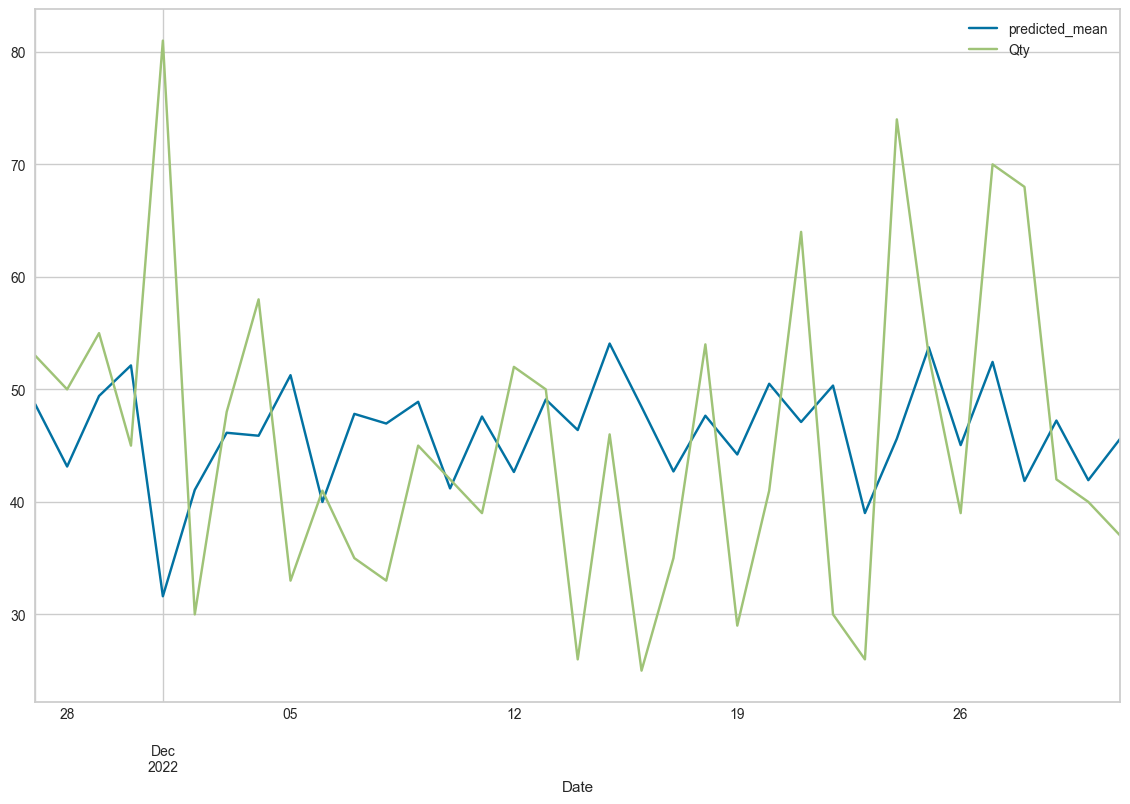

In [58]:
pred.plot(legend=True)
test['Qty'].plot(legend=True)

In [59]:
print("mae :", mean_absolute_error(test.Qty, pred))
print("rmse :", sqrt(mean_squared_error(test.Qty, pred)))

mae : 11.527880301198927
rmse : 15.110559836783594


In [60]:
# forecast quantity for the next 1 month
future = pd.date_range(start='2023-01-01', end='2023-01-30')
pred = ARIMAmodel.predict(start=len(data1), end=len(data1) + 29, typ='levels')
pred.index = future

<Axes: >

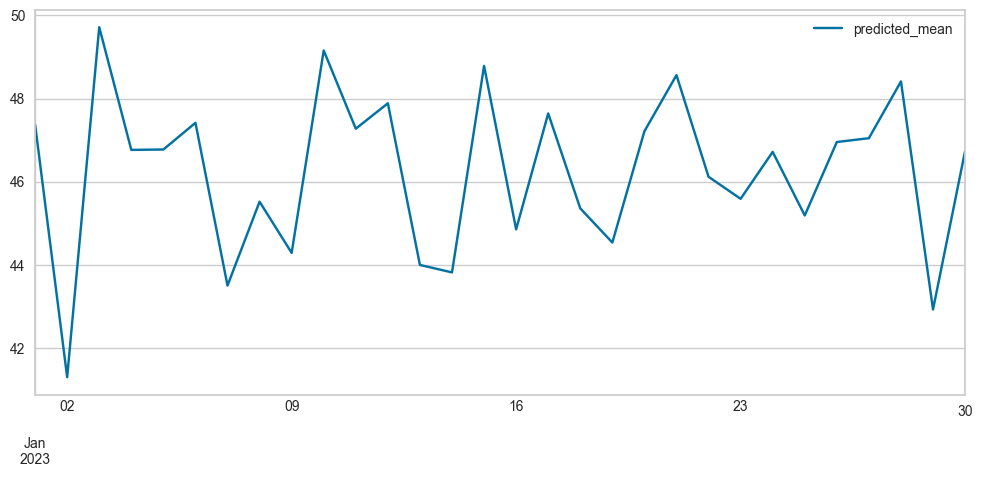

In [61]:
plt.figure(figsize=(12,5))
pred.plot(legend=True)

In [62]:
# Forecast quantity for the next 1 month
round(pred.sum())

1387

# VIII. Machine Learning Clustering

### VIII.1. Grouping Data by Date

In [63]:
data2 = data.groupby(['CustomerID']).agg({
    'TransactionID' : 'count',
    'Qty' : 'sum',
    'TotalAmount' : 'sum'
}).reset_index()

data2.head()

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600


In [64]:
data2 = data2.drop(columns='CustomerID')

### VIII.2. Check Outliers

In [65]:
# Fungsion to check Distribusion and outliers
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

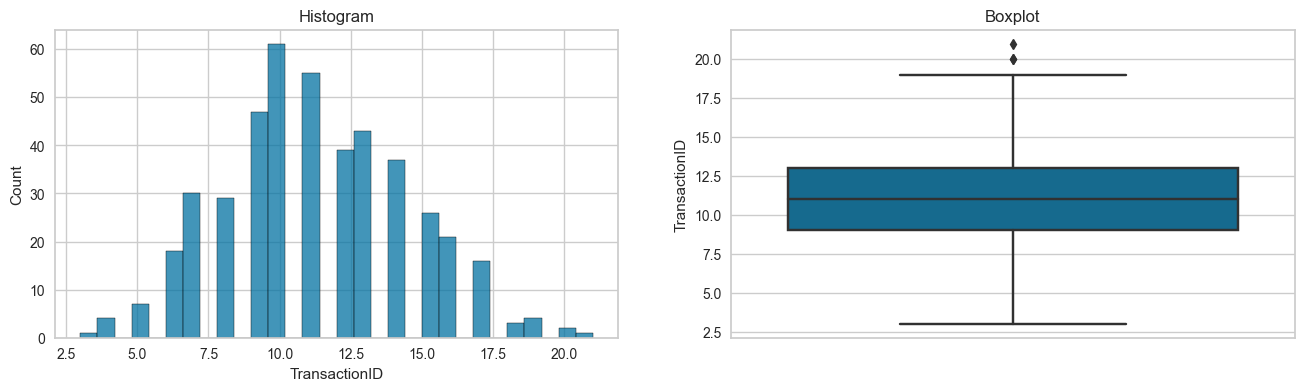


Skewness Value: 0.2



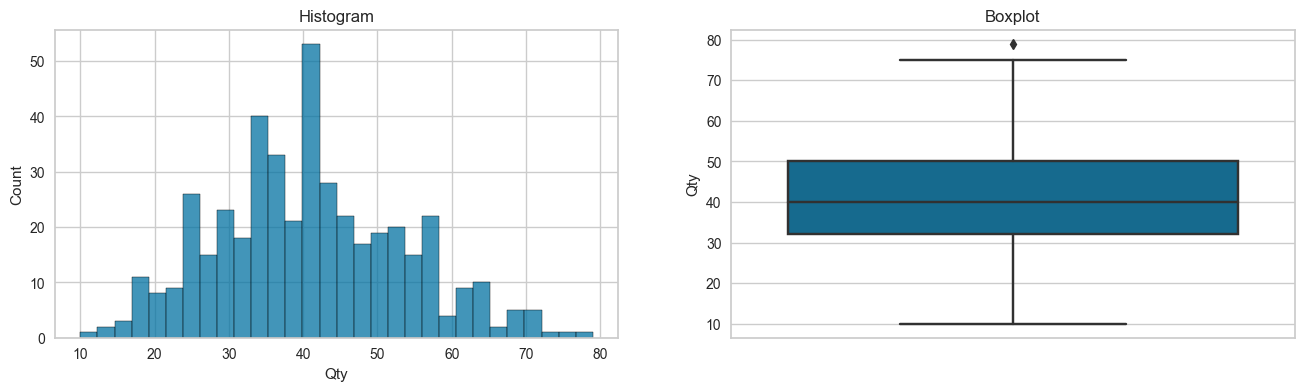


Skewness Value: 0.28



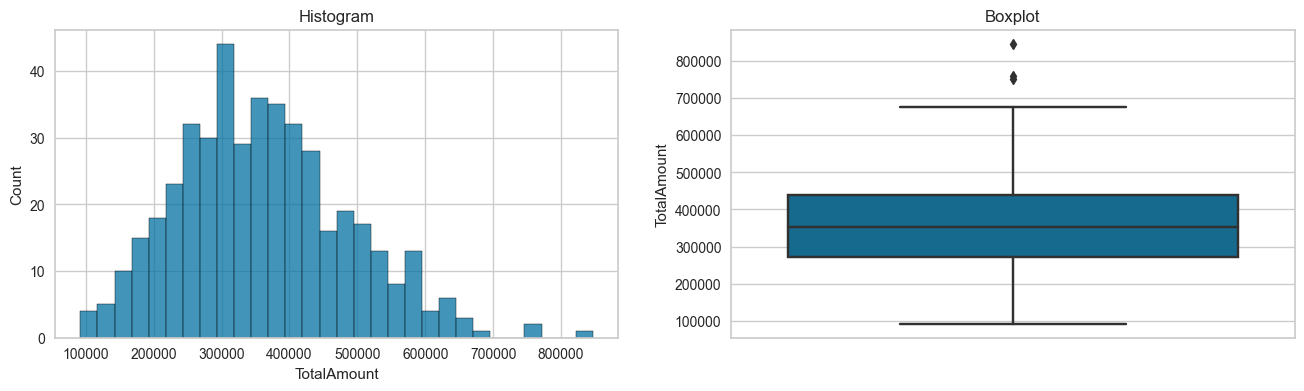


Skewness Value: 0.49



In [66]:
# Check Distribution and outliers And Skewnes 
for col in data2:
    diagnostic_plots(data2, col)
    print('\nSkewness Value:', round(data2[col].skew(),2))
    print()

Skew and outlier is normal, so nothing to handle

### VIII.3. Data Normalization

In [67]:
# Scaling using Standardscaler
data2_final = StandardScaler().fit_transform(data2)
data2_final

array([[ 1.78828224,  1.50893374,  2.10242393],
       [ 0.55344971,  1.27289149,  0.24634281],
       [ 1.17086598,  1.19421074,  0.67942841],
       ...,
       [ 2.09699037,  2.13837973,  1.81236104],
       [-0.06396655,  0.09268025,  0.49542729],
       [ 0.55344971,  0.09268025,  0.62398702]])

### VIII.4.  Model Definition

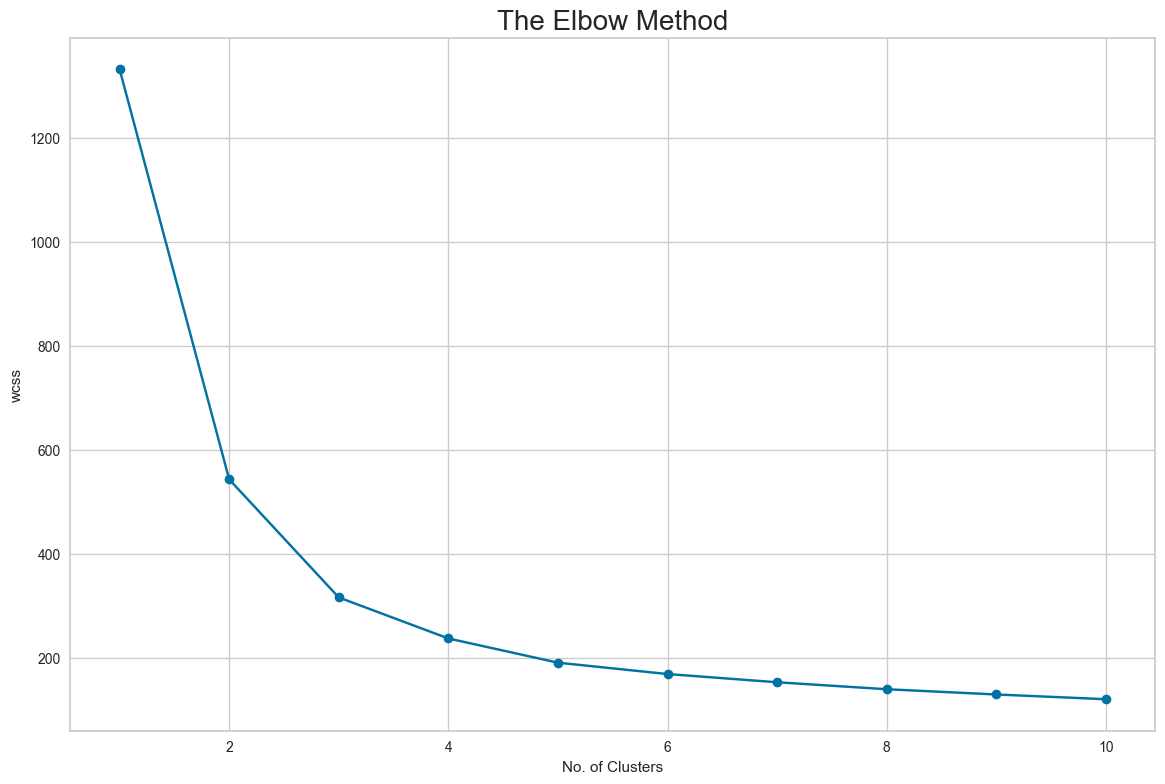

In [68]:
# Elbow method

inertia = []
#Creating iterasi from 1-10 
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 20, random_state = 42)
    km.fit(data2_final)
    inertia.append(km.inertia_)
    
plt.plot(range(1, 11), inertia, marker ="o")
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

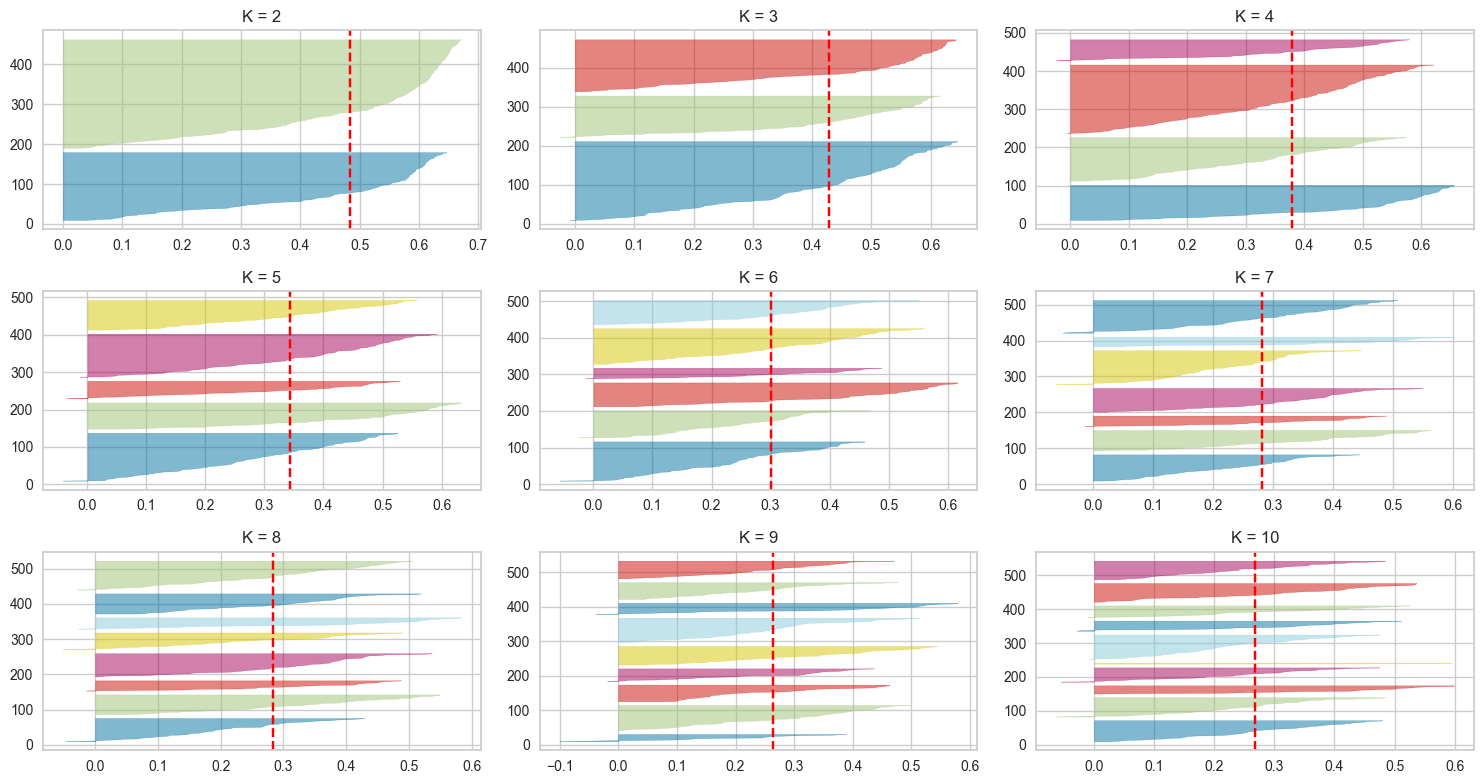

In [69]:
# Visualisasi Silhouette Score
# Set up subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 8))

# for looping subplot
for i, ax in enumerate(axes.flatten()):
    
    # Set count cluster
    n_clusters = i + 2
    
    # Initialize K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, init="k-means++", n_init = 20, max_iter = 300, random_state = 42)

    # create SilhouetteVisualizer
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax)
    
    # Fit visualizer to data x
    visualizer.fit(data2_final)
    
    # Set title
    ax.set_title(f'K = {n_clusters}')
    
# Adjust layout
plt.tight_layout()
plt.show()

Acording elbow method and Silhouette score final K is 3

### VIII.5. Model Train 

In [70]:
# Train model
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 20, random_state = 42)

In [71]:
# Fit terhadap X_final
km.fit(data2_final)

KMeans(n_clusters=3, n_init=20, random_state=42)

In [72]:
cluster = km.predict(data2_final)
cluster

array([1, 1, 1, 0, 2, 0, 1, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 2, 2, 0, 0, 1, 0, 0, 0, 2, 1, 2, 0, 1, 2, 0, 2, 2, 0, 1, 1, 1,
       1, 1, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 1, 1, 0, 2, 0, 1,
       2, 0, 0, 2, 1, 1, 2, 0, 1, 0, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 2, 1, 0, 2, 0, 0, 0, 0, 2, 2, 0, 1, 0, 2, 1, 1, 0, 1, 0, 2, 2,
       1, 2, 0, 1, 0, 2, 1, 0, 1, 1, 0, 0, 0, 2, 2, 1, 2, 0, 0, 1, 0, 1,
       0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 1, 0, 0, 2, 0, 0,
       1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 1, 1, 0, 0, 2, 0, 0,
       0, 2, 2, 0, 2, 0, 1, 2, 0, 1, 0, 1, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0,
       2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 2, 1, 1, 1, 2, 0,
       1, 0, 0, 2, 0, 2, 0, 1, 2, 1, 0, 1, 1, 1, 0, 0, 2, 0, 1, 0, 2, 0,
       0, 1, 1, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 1, 2, 2, 1, 0, 2,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 2, 2,
       0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 1, 2, 1, 2,

In [73]:
km.n_iter_

7

In [74]:
data2['cluster'] = list(cluster)
data2.head()

,TransactionID,Qty,TotalAmount,cluster
0,17,60,623300,1
1,13,57,392300,1
2,15,56,446200,1
3,10,46,302500,0
4,7,27,268600,2


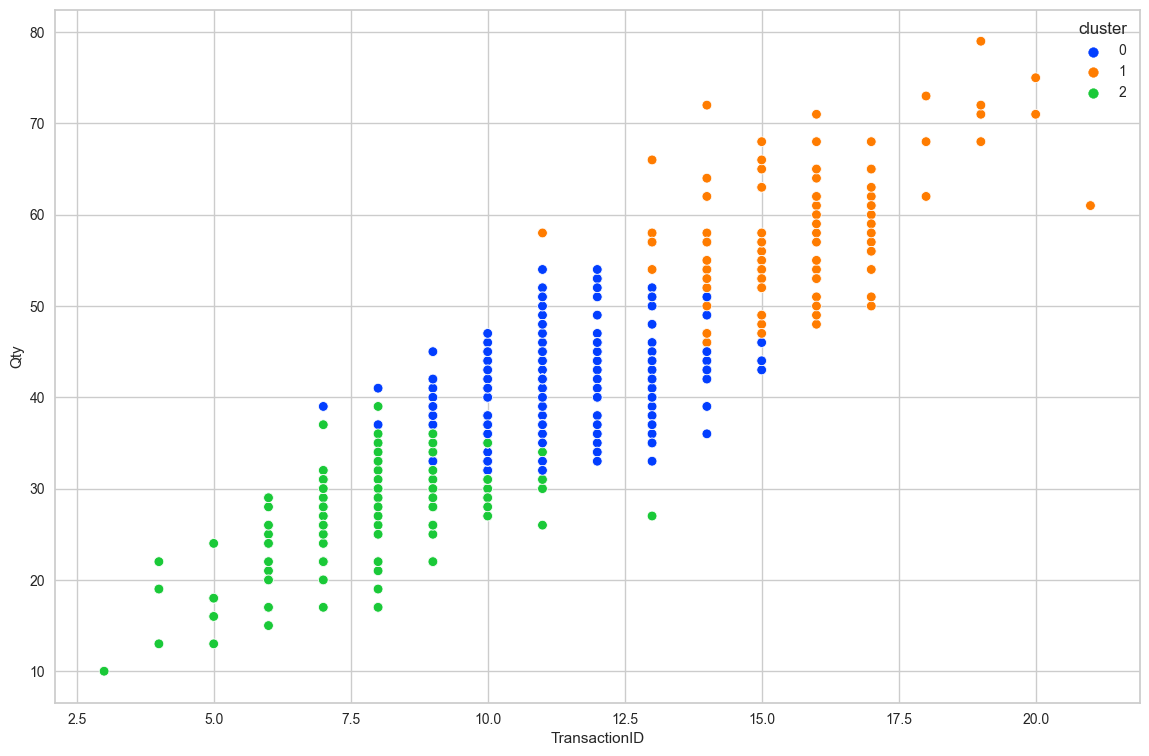

In [75]:
# Plot Cluster
sns.scatterplot(data=data2, x='TransactionID', y='Qty', hue="cluster",palette="bright")
plt.show()

In [76]:
data2.groupby('cluster').agg({
    'TransactionID' : 'mean',
    'Qty' : 'mean',
    'TotalAmount' : 'mean'
}).reset_index()

,cluster,TransactionID,Qty,TotalAmount
0,0,11.275862,41.162562,362749.753695
1,1,15.383178,57.654206,525431.775701
2,2,7.768657,26.865672,229173.880597


# IV. Conclusion

### Data Analysis

- Dominan customer gender is female 
- Dominan customer Marital Status is Married 
- Customer dominan income is between IDR 0 and 20 Million
- The top quantity is in the month of March
- The top Total amount  is from store name lingga
- The most sold product is Thai tea

### Forecasting 

- Based on model predictions, sum quantity sales for 01 januari 2023 - 30 januari 2023 is about 1387

### Clustering

- Based on model predictions, customer segmentation is divided into 3 clusters
- cluster 0 has average sales being
- cluster 1 has a high average sales
- cluster 2 has a low average sales 